/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Epoch 1/5


/Users/huiyisang/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


207/207 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8116 - loss: 0.7512 - val_accuracy: 0.8396 - val_loss: 0.4871
Epoch 2/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8418 - loss: 0.4668 - val_accuracy: 0.8453 - val_loss: 0.4671
Epoch 3/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8682 - loss: 0.3614 - val_accuracy: 0.7637 - val_loss: 0.6501
Epoch 4/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8931 - loss: 0.2852 - val_accuracy: 0.8389 - val_loss: 0.6117
Epoch 5/5
207/207 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.9365 - loss: 0.1814 - val_accuracy: 0.8350 - val_loss: 0.6887
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.06      0.12        63
           1       0.33      0.05      0.09        41
           2       0.31      0.27      0.29        98
           3       0.31      0.24      0.27       328
           4       0.90      0.95  

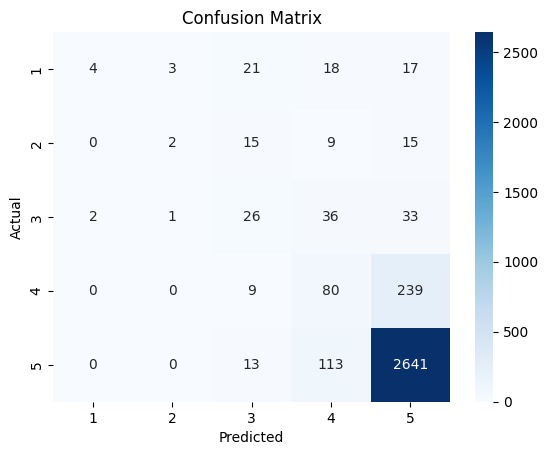

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/richard2323233/schulich_data_science/refs/heads/main/Recipe%20Reviews%20and%20User%20Feedback%20Dataset.csv')

# Prepare features and target
df = df.dropna(subset=['text'])  # Remove rows with missing text
X = df['text','receipt_name',]
y = df['stars']

# Preprocess text data
max_words = 10000
max_len = 200
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_seq, maxlen=max_len, padding='post')

# Encode target labels
y = y - 1  # Assuming star ratings are from 1 to 5, we shift them to 0 to 4 for zero-based indexing

# Filter out invalid label values
valid_indices = y >= 0
X_padded = X_padded[valid_indices]
y = y[valid_indices]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Build FCNN model
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes for star ratings 1 to 5
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()